导入所需库

In [1]:
from policy_test import PolicyTest
from LanderHover import LanderHoverEnv

/home/ubuntu/miniconda3/envs/rv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


使用规则进行控制

In [2]:
def fn(data):
    y = data["obs"][0][1] - 1
    x = data["obs"][0][0] - 0

    if abs(y) >= abs(x):
        if y > 0:
            return 0
        else:
            return 2
    else:
        if x > 0:
            return 1
        else:
            return 3

policy = PolicyTest(fn)
dataset, rew_mean = policy.get_data(LanderHoverEnv, trj_num=100)
print(f"REWARD : {rew_mean}")

REWARD : 417.9080000000012


使用DQN在线训练的策略模型进行控制

In [3]:
policy = PolicyTest("./models/dqn_policy.pt")
dataset, rew_mean = policy.get_data(LanderHoverEnv, trj_num=100)
print(f"REWARD : {rew_mean}")

REWARD : 1857.9089999999999


In [ ]:
import os

os.environ['CUDA_VISIBLE_DEVICES']='1'

使用REVIVE SDK离线训练出来的策略模型进行控制

In [2]:
policy = PolicyTest("./logs/revive/policy.pkl")
dataset, rew_mean = policy.get_data(LanderHoverEnv, trj_num=100)
print(f"REWARD : {rew_mean}")

REWARD : 2532.9759999999997


生成REVIVE SDK 离线训练出来的策略模型可视化图像

MovieWriter imagemagick unavailable; using Pillow instead.


frames: 400


{'reward': 3237.8, 'steps': 400}

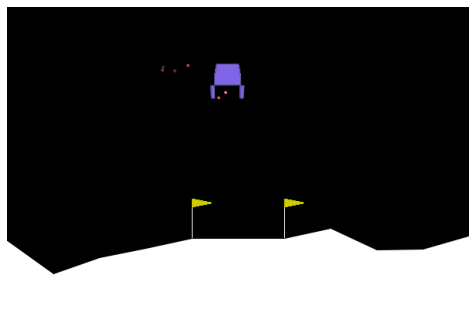

In [4]:
policy = PolicyTest("./logs/revive/policy.pkl")
policy.test_on_env(LanderHoverEnv, render_path="result.gif")